# Import the Data

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
# Import Application Train data
application_train = pd.read_csv("application_train.csv")

# Display the DataFrame
application_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:

# Import Application Test data
application_test = pd.read_csv("application_test.csv")

# Display the DataFrame
application_test.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

## Data Profiling

In [4]:
# check the shape of train data
application_train.shape

(307511, 122)

In [5]:
# check the shape of test data
application_test.shape

(48744, 121)

In [6]:
# check the info of train data
application_train.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [7]:
# check the info of test data
application_test.info

<bound method DataFrame.info of        SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N

In [8]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
application_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [10]:
# check duplicate for train data
application_train.duplicated().sum()

0

In [11]:
# check duplicate for test data
application_test.duplicated().sum()

0

In [10]:
# check the percentage of missing value
count_null = application_train.isna().sum()
data_null = pd.DataFrame(count_null, columns=['Total Null']).reset_index()
data_null['Percentage'] = (data_null['Total Null'] / len(application_train))*100
data_null.sort_values(by='Percentage', ascending=False)

,index,Total Null,Percentage
76,COMMONAREA_MEDI,214865,69.872297
48,COMMONAREA_AVG,214865,69.872297
62,COMMONAREA_MODE,214865,69.872297
70,NONLIVINGAPARTMENTS_MODE,213514,69.432963
56,NONLIVINGAPARTMENTS_AVG,213514,69.432963
...,...,...,...
15,NAME_HOUSING_TYPE,0,0.000000
14,NAME_FAMILY_STATUS,0,0.000000
13,NAME_EDUCATION_TYPE,0,0.000000
12,NAME_INCOME_TYPE,0,0.000000


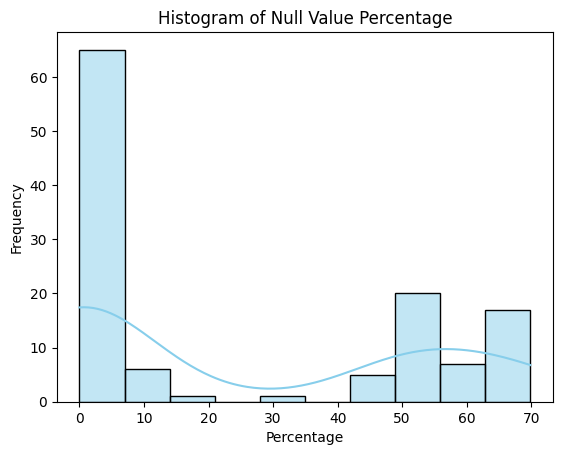

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histogram
sns.histplot(data=data_null, x='Percentage', bins=10, kde=True, color='skyblue')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.title('Histogram of Null Value Percentage')
plt.show()

In [12]:
# check the percentage of missing value test data
count_null = application_test.isna().sum()
data_null2 = pd.DataFrame(count_null, columns=['Total Null']).reset_index()
data_null2['Percentage'] = (data_null2['Total Null'] / len(application_train))*100
data_null2.sort_values(by='Percentage', ascending=False)

,index,Total Null,Percentage
47,COMMONAREA_AVG,33495,10.892293
61,COMMONAREA_MODE,33495,10.892293
75,COMMONAREA_MEDI,33495,10.892293
55,NONLIVINGAPARTMENTS_AVG,33347,10.844165
69,NONLIVINGAPARTMENTS_MODE,33347,10.844165
...,...,...,...
14,NAME_HOUSING_TYPE,0,0.000000
13,NAME_FAMILY_STATUS,0,0.000000
12,NAME_EDUCATION_TYPE,0,0.000000
11,NAME_INCOME_TYPE,0,0.000000


## Data Cleansing

Drop variables that have more than 40% missing value

In [13]:
# drop Id variable and data with more than 40% missing value
data = data_null[data_null['Percentage'] > 40]['index']
data_for_cleaning = application_train.drop(columns = data, inplace=True)
data_for_cleaning = application_train.drop(columns = 'SK_ID_CURR')

In [11]:
data_for_cleaning

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
data_null = pd.DataFrame(data_for_cleaning.isnull().sum(), columns=['Total Null']).reset_index()
data_null['Percentage'] = (data_null['Total Null'] / len(application_train))*100
still_null = data_null[data_null['Percentage'] != 0].sort_values(by='Percentage', ascending=False)
still_null

,index,Total Null,Percentage
26,OCCUPATION_TYPE,96391,31.345545
40,EXT_SOURCE_3,60965,19.825307
71,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
70,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
69,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
68,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
67,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
66,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
10,NAME_TYPE_SUITE,1292,0.420148
44,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021


Fill missing value with mode if the data type is object, and median for else

In [15]:
a = list(still_null['index'])
data_for_cleaning[a].dtypes

for i in a:
    data = data_for_cleaning[i]
    types = str(data.dtype)
    if types == 'object':
        data_for_cleaning[i].fillna(data_for_cleaning[i].mode()[0], inplace=True)
    else:
        data_for_cleaning[i].fillna(data_for_cleaning[i].median(), inplace=True)

In [16]:
data_null = pd.DataFrame(data_for_cleaning.isnull().sum(), columns=['Total Null']).reset_index()
data_null['Percentage'] = (data_null['Total Null'] / len(data_for_cleaning))*100
still_null = data_null[data_null['Percentage'] > 0].sort_values(by='Percentage', ascending=False)
still_null

,index,Total Null,Percentage


In [15]:
data_for_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

Remove XNA in CODE_GENDER and ORGANIZATION_TYPE column

In [17]:
data_for_cleaning['CODE_GENDER'] = data_for_cleaning['CODE_GENDER'].replace(['XNA'], data_for_cleaning['CODE_GENDER'].mode()[0])
data_for_cleaning['ORGANIZATION_TYPE'] = data_for_cleaning['ORGANIZATION_TYPE'].replace(['XNA'], data_for_cleaning['ORGANIZATION_TYPE'].mode()[0])

Remove Flag Document columns

In [18]:
FLAG_DOCUMENT = [col for col in data_for_cleaning.columns if 'FLAG_DOCUMENT' in col]
data_for_cleaning.drop(columns = FLAG_DOCUMENT, axis=1, inplace=True)

In [111]:
data_train = data_for_cleaning
print(data_train)

        TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0            1         Cash loans           M            N               Y   
1            0         Cash loans           F            N               N   
2            0    Revolving loans           M            Y               Y   
3            0         Cash loans           F            N               Y   
4            0         Cash loans           M            N               Y   
...        ...                ...         ...          ...             ...   
307506       0         Cash loans           M            N               N   
307507       0         Cash loans           F            N               Y   
307508       0         Cash loans           F            N               Y   
307509       1         Cash loans           F            N               Y   
307510       0         Cash loans           F            N               N   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY

In [112]:
## Data Test
var_test = application_test.columns.intersection(data_train.columns)
data_test = application_test[var_test]
print(data_test)

      NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0             Cash loans           F            N               Y   
1             Cash loans           M            N               Y   
2             Cash loans           M            Y               Y   
3             Cash loans           F            N               Y   
4             Cash loans           M            Y               N   
...                  ...         ...          ...             ...   
48739         Cash loans           F            N               Y   
48740         Cash loans           F            N               N   
48741         Cash loans           F            Y               Y   
48742         Cash loans           M            N               N   
48743         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0  

In [113]:
data_null2 = pd.DataFrame(data_test.isnull().sum(), columns=['Total Null']).reset_index()
data_null2['Percentage'] = (data_null2['Total Null'] / len(application_test))*100
still_null2 = data_null2[data_null2['Percentage'] != 0].sort_values(by='Percentage', ascending=False)
still_null2

,index,Total Null,Percentage
25,OCCUPATION_TYPE,15605,32.014197
39,EXT_SOURCE_3,8668,17.782701
45,AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.409732
46,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
47,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
48,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
49,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
50,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
9,NAME_TYPE_SUITE,911,1.868948
40,OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495


In [114]:
b = list(still_null2['index'])
data_test[b].dtypes

for i in b:
    data = data_test[i]
    types = str(data.dtype)
    if types == 'object':
        data_test[i].fillna(data_test[i].mode()[0], inplace=True)
    else:
        data_test[i].fillna(data_test[i].median(), inplace=True)

C:\Users\dilla\AppData\Local\Temp\ipykernel_23836\3533395797.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[i].fillna(data_test[i].mode()[0], inplace=True)
C:\Users\dilla\AppData\Local\Temp\ipykernel_23836\3533395797.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test[i].fillna(data_test[i].median(), inplace=True)
C:\Users\dilla\AppData\Local\Temp\ipykernel_23836\3533395797.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [26]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NAME_CONTRACT_TYPE           48744 non-null  object 
 1   CODE_GENDER                  48744 non-null  object 
 2   FLAG_OWN_CAR                 48744 non-null  object 
 3   FLAG_OWN_REALTY              48744 non-null  object 
 4   CNT_CHILDREN                 48744 non-null  int64  
 5   AMT_INCOME_TOTAL             48744 non-null  float64
 6   AMT_CREDIT                   48744 non-null  float64
 7   AMT_ANNUITY                  48744 non-null  float64
 8   AMT_GOODS_PRICE              48744 non-null  float64
 9   NAME_TYPE_SUITE              48744 non-null  object 
 10  NAME_INCOME_TYPE             48744 non-null  object 
 11  NAME_EDUCATION_TYPE          48744 non-null  object 
 12  NAME_FAMILY_STATUS           48744 non-null  object 
 13  NAME_HOUSING_TYP

In [ ]:
data_test['CODE_GENDER'] = data_test['CODE_GENDER'].replace(['XNA'], data_test['CODE_GENDER'].mode()[0])
data_test['ORGANIZATION_TYPE'] = data_test['ORGANIZATION_TYPE'].replace(['XNA'], data_test['ORGANIZATION_TYPE'].mode()[0])

## Exploratory Data Analysis

In [106]:

n_apply = data_train.groupby('TARGET')['CODE_GENDER'].count().reset_index()
n_apply.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)

n_apply['Percentage'] = round(n_apply.Customers / n_apply.Customers.sum(), 2)
n_apply

,TARGET,Customers,Percentage
0,0,282686,0.92
1,1,24825,0.08


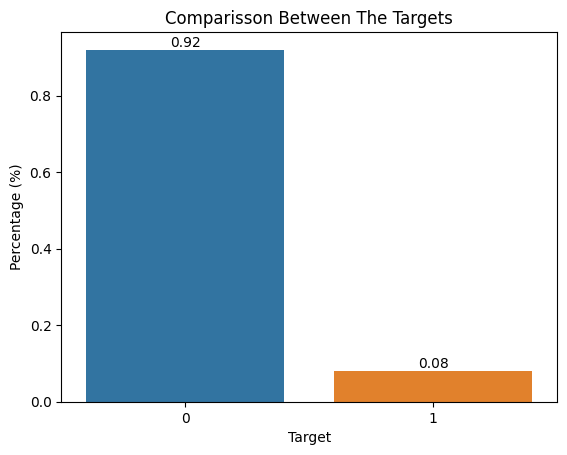

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data in a pandas DataFrame or similar structure
# x should be the categorical variable, and y should be the numeric variable
sns.barplot(x='TARGET', y='Percentage', data=n_apply)

# Add value labels to each bar
for index, value in enumerate(n_apply['Percentage']):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Optionally, you can customize the appearance
plt.title('Comparisson Between The Targets')
plt.xlabel('Target')
plt.ylabel('Percentage (%)')
plt.show()


It can be seen that 92% of customers have no difficulty in paying loans. Meanwhile, there are 8% of customers who have difficulty paying loans. There is an imbalance in these results

In [115]:
data_train['Age'] = np.floor(data_train['DAYS_BIRTH'] / -365).astype(int)
data_train.drop(columns= 'DAYS_BIRTH', inplace=True)


In [116]:
age_cat = []
for i in data_train['Age']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

data_train['Age_category'] = age_cat

In [117]:
age_cat = []
for i in data_train['Age']:
    if i < 36:
        age_cat.append('Young Adult')
    elif i < 51:
        age_cat.append('Adult')
    else:
        age_cat.append('Older')

data_train['Age_category'] = age_cat

In [118]:
g_age = data_train.groupby(['TARGET', 'Age_category'])['CODE_GENDER'].count().reset_index().sort_values('Age_category').reset_index()
g_age.rename(columns = {'CODE_GENDER' : 'Customers'}, inplace=True)
g_age.drop(columns = 'index', inplace=True)

name_of_ot = list(g_age['Age_category'].unique())
percentage = []

for i in name_of_ot:
    data = g_age[g_age['Age_category'] == i]
    total = data['Customers'].sum()
    for x,y in enumerate(data['Customers']):
        pct = round(y / total, 2)
        percentage.append(pct)

g_age['percentage'] = percentage

mapping_target = {
    1 : 'Have Problem',
    0 : 'Dont Have Problem'
}

g_age['TARGET'] = g_age['TARGET'].map(mapping_target)
g_age

,TARGET,Age_category,Customers,percentage
0,Dont Have Problem,Adult,108678,0.92
1,Have Problem,Adult,9403,0.08
2,Dont Have Problem,Older,91718,0.94
3,Have Problem,Older,5469,0.06
4,Dont Have Problem,Young Adult,82290,0.89
5,Have Problem,Young Adult,9953,0.11


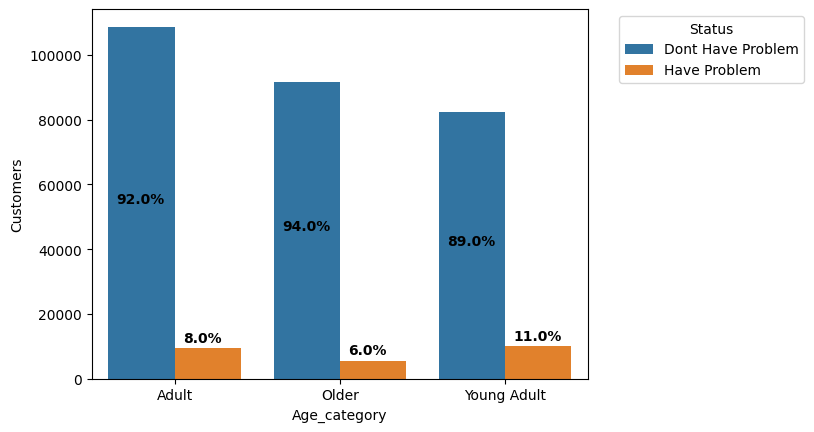

In [119]:
ax = sns.barplot(x = 'Age_category', y= 'Customers', hue= g_age.TARGET, data = g_age)
plt.legend(title = 'Status', bbox_to_anchor = (1.45,1))

for i, v in enumerate(g_age['Customers']):
    if i%2 == 0:
        plt.text(i/2 - 0.35, v/2, s= str(g_age['percentage'][i]* 100) + '%', color='black', fontweight='bold')
    else:
        plt.text(i/2 - 0.45, v + 2000, s= str(g_age['percentage'][i] * 100) + '%', color='black', fontweight='bold')

plt.show(ax)

# Feature Engineering

In [73]:
x = data_train.drop(columns = 'TARGET')

## For Numeric Data Type

In [74]:
num = x.select_dtypes(exclude='object')
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

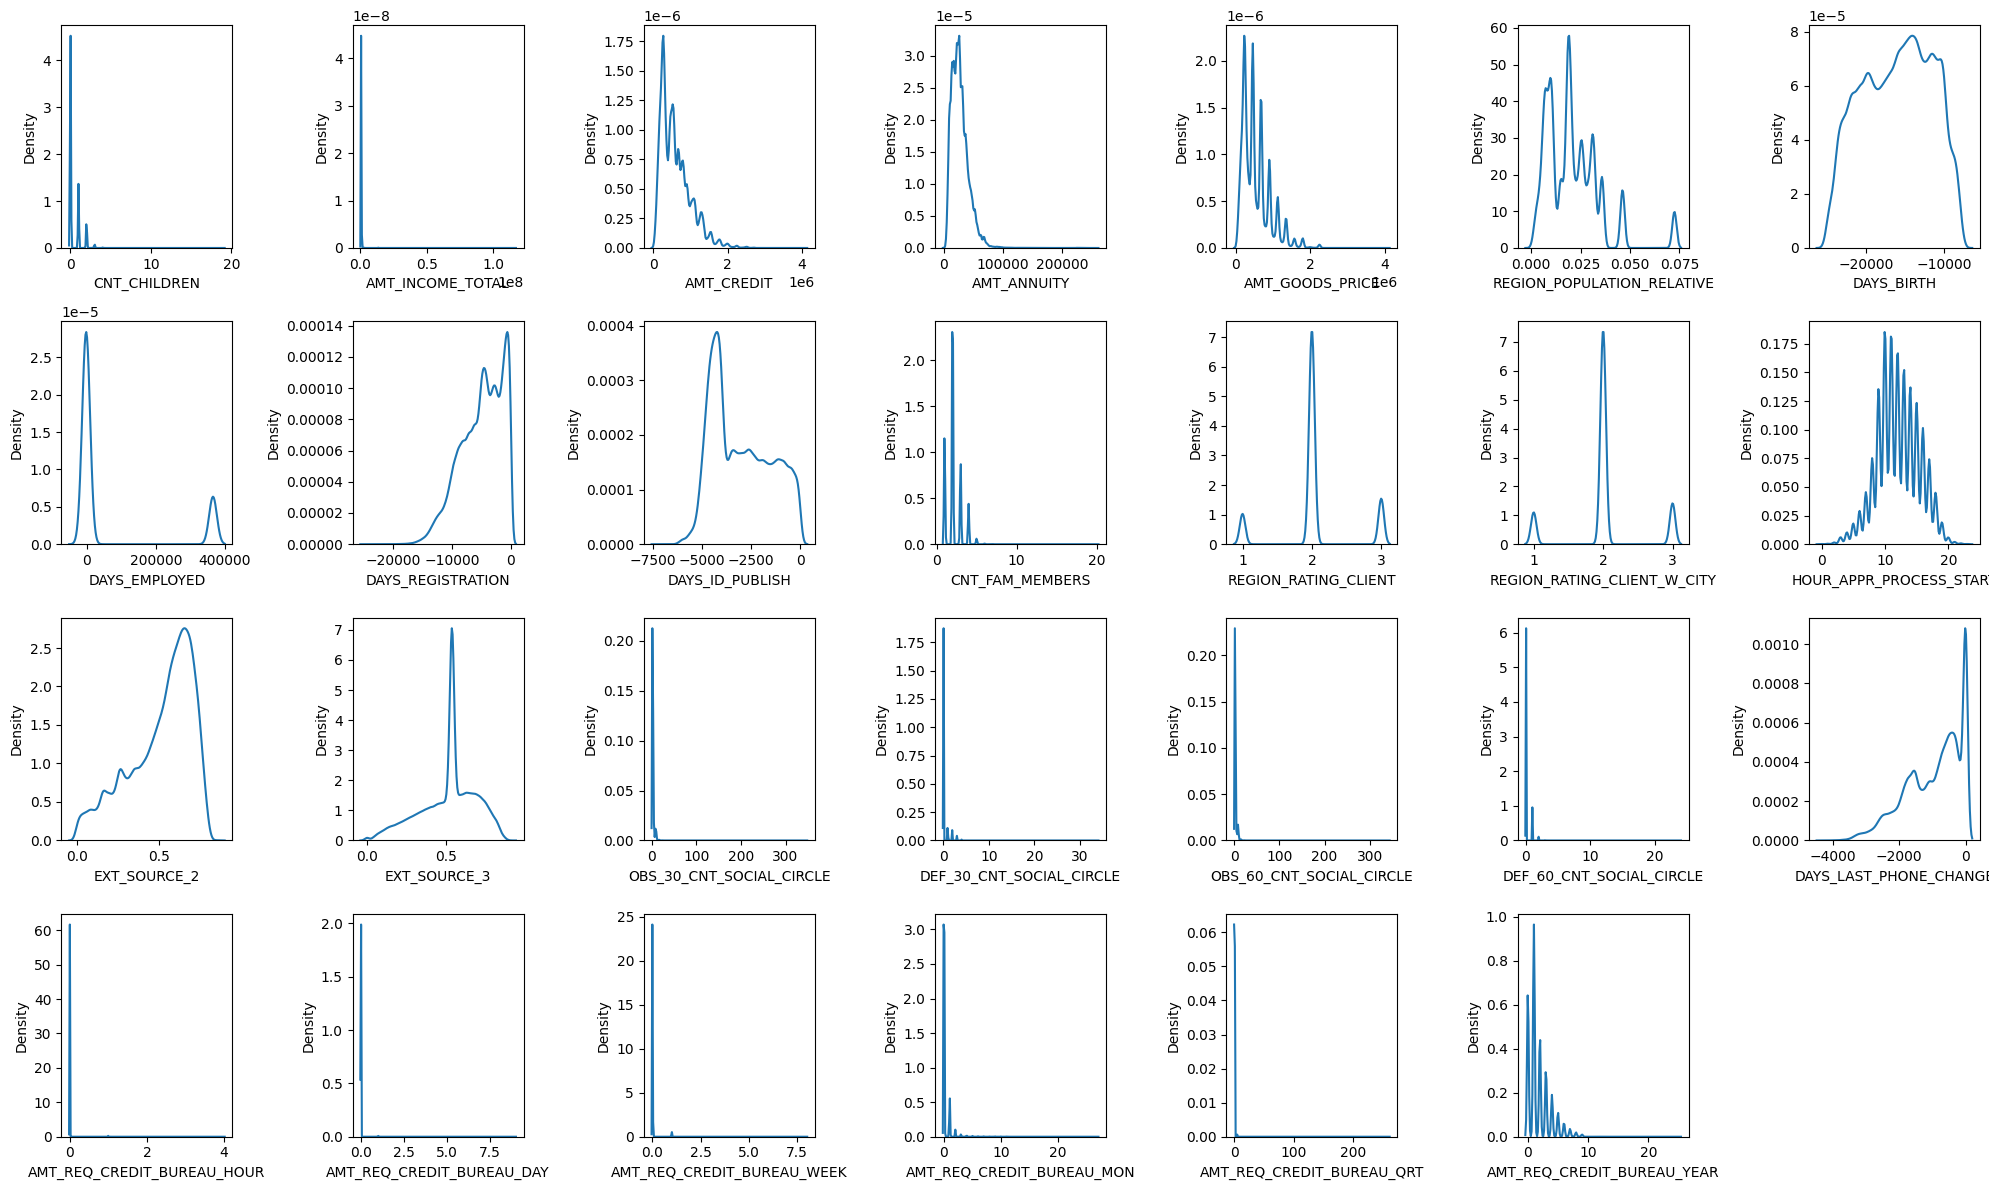

In [28]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(4,7,i)
    sns.kdeplot(data=num[num_a], x=num[column])
    plt.tight_layout()

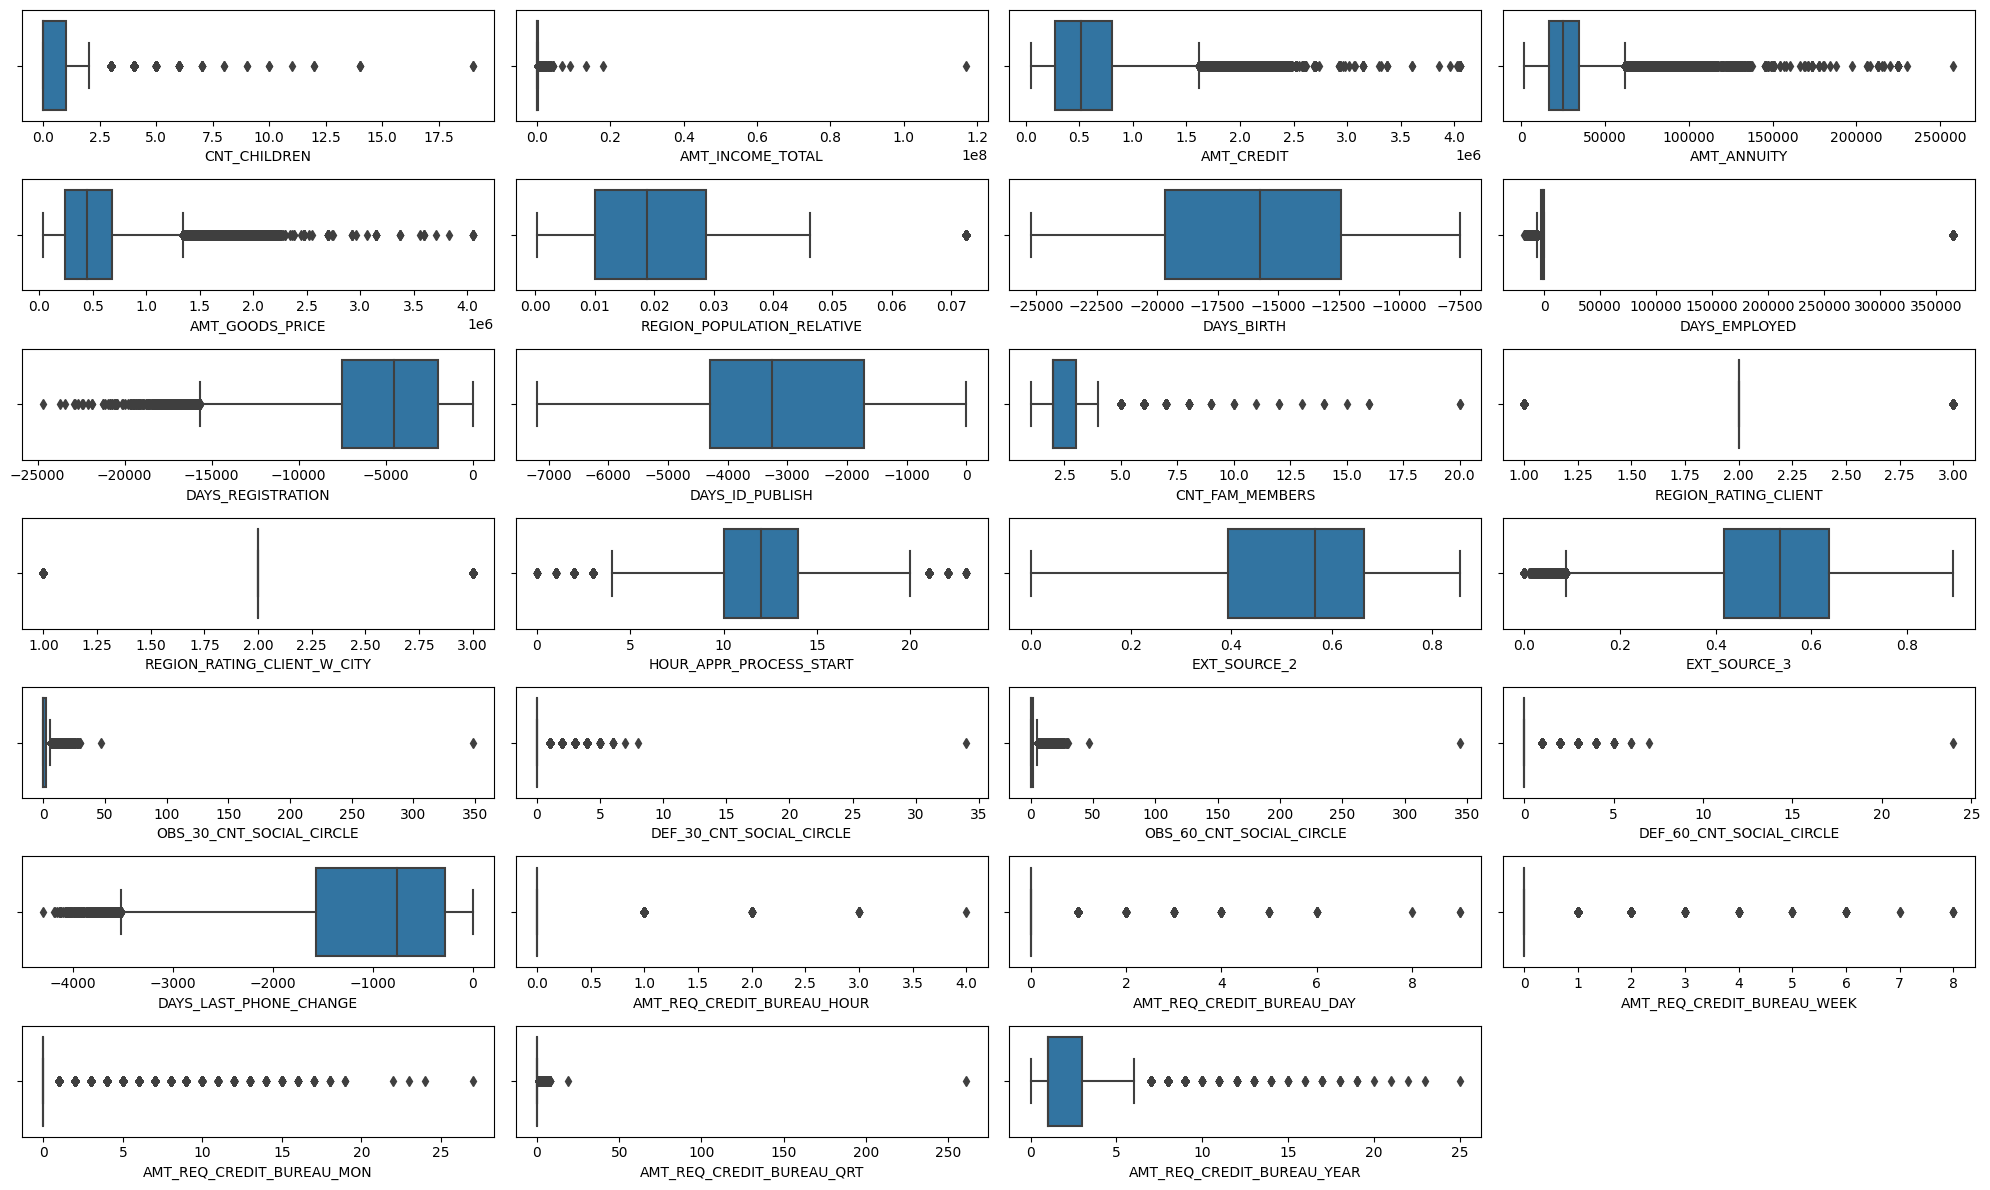

In [29]:
plt.figure(figsize=(20,12))

for i, column in enumerate (num[num_a].columns, 1):
    plt.subplot(7,4,i)
    sns.boxplot(data=num[num_a], x=num[column])
    plt.tight_layout()

In [23]:
filtered_entries = np.array([True] * len(data_train))

zscore = abs(stats.zscore(data_train['CNT_CHILDREN'])) 
filtered_entries = (zscore < 3) & filtered_entries 
    
data_train = data_train[filtered_entries] 

print(f'Row after delete outlier at CNT_children : {len(data_train)}')

Row after delete outlier at CNT_children : 303239


In [76]:
x = data_train.drop(columns = 'TARGET', axis=1)
num = x[num_a]
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
num_mean = num.mean()
num_std = num.std()

num = (num - num_mean) / num_std
num.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.577537,0.142129,-0.478094,-0.166143,-0.507235,-0.149452,1.506877,-0.456214,0.379836,0.579153,...,4.163498,0.252132,5.253252,-0.206991,-0.070987,-0.058766,-0.155837,-0.269946,-0.308619,-0.440925
1,-0.577537,0.426791,1.725447,0.592682,1.600870,-1.252748,-0.166821,-0.460115,1.078695,1.790852,...,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269946,-0.308619,-1.007329
2,-0.577537,-0.427195,-1.152886,-1.404667,-1.092143,-0.783450,-0.689508,-0.453298,0.206115,0.306868,...,-0.320480,-0.589186,-0.275663,0.178830,-0.070987,-0.058766,-0.155837,-0.269946,-0.308619,-1.007329
3,-0.577537,-0.142533,-0.711429,0.177874,-0.653462,-0.928989,-0.680113,-0.473217,-1.375826,0.369143,...,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269946,-0.308619,-0.440925
4,-0.577537,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892533,-0.473210,0.191638,-0.307263,...,-0.320480,-0.589186,-0.275663,-0.173126,-0.070987,-0.058766,-0.155837,-0.269946,-0.308619,-1.007329


In [78]:
num_1 = x[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num = pd.concat([num, num_1], axis=1)
num

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.577537,0.142129,-0.478094,-0.166143,-0.507235,-0.149452,1.506877,-0.456214,0.379836,0.579153,...,0,1,1,0,0,0,0,0,0,0
1,-0.577537,0.426791,1.725447,0.592682,1.600870,-1.252748,-0.166821,-0.460115,1.078695,1.790852,...,0,1,1,0,0,0,0,0,0,0
2,-0.577537,-0.427195,-1.152886,-1.404667,-1.092143,-0.783450,-0.689508,-0.453298,0.206115,0.306868,...,1,1,1,0,0,0,0,0,0,0
3,-0.577537,-0.142533,-0.711429,0.177874,-0.653462,-0.928989,-0.680113,-0.473217,-1.375826,0.369143,...,0,1,0,0,0,0,0,0,0,0
4,-0.577537,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892533,-0.473210,0.191638,-0.307263,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-0.577537,-0.047646,-0.855488,0.031015,-0.848431,0.845394,1.537583,-0.453376,-0.984954,0.670577,...,0,1,0,0,0,0,0,0,0,0
307507,-0.577537,-0.408218,-0.818593,-1.042331,-0.848431,0.310592,-1.085705,2.133614,0.169781,-0.725958,...,0,1,1,0,0,0,0,0,0,0
307508,-0.577537,-0.066623,0.195378,0.198056,0.126415,-1.147118,0.245417,-0.507773,-0.497001,-1.428200,...,0,1,0,1,0,0,0,0,1,1
307509,-0.577537,0.009287,-0.568756,-0.476317,-0.592534,-1.124633,0.934007,-0.485583,0.688106,1.366857,...,0,1,0,0,0,0,0,1,1,0


In [59]:
## Numeric for Test Data
num = data_test.select_dtypes(exclude='object')
df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)


In [60]:
num = data_test[num_a]
num_mean = num.mean()
num_std = num.std()

num = (num - num_mean) / num_std
num.head()


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.559983,-0.427804,0.142474,-0.553574,-0.037477,-0.164653,-0.733469,-0.483651,-0.056957,1.427226,...,-0.279164,-0.400892,-0.250395,-0.753462,-0.042538,-0.036584,-0.048265,-0.07842,-0.711314,-1.153854
1,-0.559983,-0.782405,-0.804529,-0.752824,-0.839353,1.009576,-0.461387,-0.498477,-1.168252,0.910428,...,-0.279164,-0.400892,-0.250395,1.226238,-0.042538,-0.036584,-0.048265,-0.07842,-0.711314,0.589318
2,-0.559983,0.237072,0.400998,2.520040,0.497107,-0.147256,-0.917708,-0.498400,0.786084,-0.287576,...,-0.279164,-0.400892,-0.250395,0.252317,-0.042538,-0.036584,-0.048265,-0.07842,0.773580,1.170375
3,2.260705,1.345200,2.896191,1.223653,3.303675,0.358074,0.483618,-0.480444,0.835344,-0.736828,...,-0.279164,-0.400892,-0.250395,-0.827417,-0.042538,-0.036584,-0.048265,-0.07842,-0.711314,0.589318
4,0.850361,0.015447,0.297648,0.165017,0.483743,-0.775817,0.699989,-0.482695,0.272378,-0.771239,...,-0.279164,-0.400892,-0.250395,0.292138,-0.042538,-0.036584,-0.048265,-0.07842,-0.711314,0.008261


In [61]:
num_1 = data_test[num_b]
num_1 = num_1.loc[~num_1.index.duplicated(keep='first')]

num2 = pd.concat([num, num_1], axis=1)
num2

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,-0.559983,-0.427804,0.142474,-0.553574,-0.037477,-0.164653,-0.733469,-0.483651,-0.056957,1.427226,...,0,1,0,1,0,0,0,0,0,0
1,-0.559983,-0.782405,-0.804529,-0.752824,-0.839353,1.009576,-0.461387,-0.498477,-1.168252,0.910428,...,0,1,0,0,0,0,0,0,0,0
2,-0.559983,0.237072,0.400998,2.520040,0.497107,-0.147256,-0.917708,-0.498400,0.786084,-0.287576,...,0,1,0,0,0,0,0,0,0,0
3,2.260705,1.345200,2.896191,1.223653,3.303675,0.358074,0.483618,-0.480444,0.835344,-0.736828,...,0,1,1,0,0,0,0,0,0,0
4,0.850361,0.015447,0.297648,0.165017,0.483743,-0.775817,0.699989,-0.482695,0.272378,-0.771239,...,1,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-0.559983,-0.560780,-0.285116,-0.746360,-0.572061,-1.329594,-0.901989,-0.503326,-1.161497,-0.221304,...,1,1,1,0,0,0,0,0,0,0
48740,2.260705,-0.206179,0.289199,0.155181,0.096169,1.009576,1.128571,-0.475477,0.549639,0.031042,...,0,1,0,0,0,0,0,0,1,1
48741,0.850361,0.237072,-0.552113,0.236117,-0.438415,0.358074,0.033770,-0.488556,0.643654,0.986259,...,0,1,1,0,0,0,0,0,0,0
48742,-0.559983,0.458698,-0.182652,-0.268330,-0.037477,-0.164653,0.485468,-0.486436,0.987063,1.075472,...,1,1,1,0,0,1,1,0,1,1


## For Object Data Type

In [79]:
obj = x.select_dtypes(include='object')
df_obj = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
df_obj = df_obj.rename(columns = {'index' : 'Name_of_column'})

obj_1 = []
obj_2 = []
for i,y in enumerate(df_obj.Name_of_column):
    if df_obj['Total_unique'][i] > 2:
        obj_1.append(y)
    else:
        obj_2.append(y)
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,Laborers,MONDAY,Business Entity Type 3
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


One-Hot Encoding

In [80]:
for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)
    
obj = obj.drop(columns = obj_1)

Label Encoding

In [81]:
label_encoder = preprocessing.LabelEncoder()
  
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])
    
obj

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307507,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307508,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307509,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df = pd.concat([num, obj], axis=1)
data_train = pd.concat([df, data_train['TARGET']],axis=1)
data_train.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,TARGET
0,-0.577537,0.142129,-0.478094,-0.166143,-0.507235,-0.149452,1.506877,-0.456214,0.379836,0.579153,...,0,0,0,0,0,0,0,0,0,1
1,-0.577537,0.426791,1.725447,0.592682,1.600870,-1.252748,-0.166821,-0.460115,1.078695,1.790852,...,0,0,0,0,0,0,0,0,0,0
2,-0.577537,-0.427195,-1.152886,-1.404667,-1.092143,-0.783450,-0.689508,-0.453298,0.206115,0.306868,...,0,0,0,0,0,0,0,0,0,0
3,-0.577537,-0.142533,-0.711429,0.177874,-0.653462,-0.928989,-0.680113,-0.473217,-1.375826,0.369143,...,0,0,0,0,0,0,0,0,0,0
4,-0.577537,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,-0.892533,-0.473210,0.191638,-0.307263,...,0,0,0,0,0,0,0,0,0,0


In [53]:
## For Test Data
obj = data_test.select_dtypes(include='object')
df_obj = pd.DataFrame(obj.nunique(), columns = ['Total_unique']).reset_index()
df_obj = df_obj.rename(columns = {'index' : 'Name_of_column'})

obj_1 = []
obj_2 = []
for i,y in enumerate(df_obj.Name_of_column):
    if df_obj['Total_unique'][i] > 2:
        obj_1.append(y)
    else:
        obj_2.append(y)
obj


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Laborers,TUESDAY,Kindergarten
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed
2,Cash loans,M,Y,Y,Unaccompanied,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,FRIDAY,Business Entity Type 3
...,...,...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,Laborers,WEDNESDAY,Other
48740,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,MONDAY,Trade: type 7
48741,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
48742,Cash loans,M,N,N,Family,Commercial associate,Higher education,Married,House / apartment,Managers,MONDAY,Self-employed


In [54]:
for cat in obj_1:
    onehots = pd.get_dummies(obj[cat], prefix=cat)
    obj = obj.join(onehots)
    
obj = obj.drop(columns = obj_1)

In [56]:
label_encoder = preprocessing.LabelEncoder()
  
for cat in obj_2:
    obj[cat]= label_encoder.fit_transform(obj[cat])
    
obj2 = obj
obj2

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48741,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48742,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data_test = pd.concat([num2, obj2], axis=1)
data_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,-0.559983,-0.427804,0.142474,-0.553574,-0.037477,-0.164653,-0.733469,-0.483651,-0.056957,1.427226,...,0,0,0,0,0,0,0,0,0,0
1,-0.559983,-0.782405,-0.804529,-0.752824,-0.839353,1.009576,-0.461387,-0.498477,-1.168252,0.910428,...,0,0,0,0,0,0,0,0,0,0
2,-0.559983,0.237072,0.400998,2.520040,0.497107,-0.147256,-0.917708,-0.498400,0.786084,-0.287576,...,0,0,0,0,0,0,0,1,0,0
3,2.260705,1.345200,2.896191,1.223653,3.303675,0.358074,0.483618,-0.480444,0.835344,-0.736828,...,0,0,0,0,0,0,0,0,0,0
4,0.850361,0.015447,0.297648,0.165017,0.483743,-0.775817,0.699989,-0.482695,0.272378,-0.771239,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-0.559983,-0.560780,-0.285116,-0.746360,-0.572061,-1.329594,-0.901989,-0.503326,-1.161497,-0.221304,...,0,0,0,0,0,0,0,0,0,0
48740,2.260705,-0.206179,0.289199,0.155181,0.096169,1.009576,1.128571,-0.475477,0.549639,0.031042,...,0,0,0,0,1,0,0,0,0,0
48741,0.850361,0.237072,-0.552113,0.236117,-0.438415,0.358074,0.033770,-0.488556,0.643654,0.986259,...,0,0,0,0,0,0,0,0,0,0
48742,-0.559983,0.458698,-0.182652,-0.268330,-0.037477,-0.164653,0.485468,-0.486436,0.987063,1.075472,...,0,0,0,0,0,0,0,0,0,0


In [84]:
missing_col = [kolom for kolom in data_train.columns if kolom not in data_test.columns]

print("The missing columns:")
print(missing_col)

The missing columns:
['NAME_INCOME_TYPE_Maternity leave', 'NAME_FAMILY_STATUS_Unknown', 'TARGET']


In [85]:
data_test['NAME_INCOME_TYPE_Maternity leave']=0
data_test['NAME_FAMILY_STATUS_Unknown'] = 0
data_test

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,NAME_INCOME_TYPE_Maternity leave,NAME_FAMILY_STATUS_Unknown
0,-0.559983,-0.427804,0.142474,-0.553574,-0.037477,-0.164653,-0.733469,-0.483651,-0.056957,1.427226,...,0,0,0,0,0,0,0,0,0,0
1,-0.559983,-0.782405,-0.804529,-0.752824,-0.839353,1.009576,-0.461387,-0.498477,-1.168252,0.910428,...,0,0,0,0,0,0,0,0,0,0
2,-0.559983,0.237072,0.400998,2.520040,0.497107,-0.147256,-0.917708,-0.498400,0.786084,-0.287576,...,0,0,0,0,0,1,0,0,0,0
3,2.260705,1.345200,2.896191,1.223653,3.303675,0.358074,0.483618,-0.480444,0.835344,-0.736828,...,0,0,0,0,0,0,0,0,0,0
4,0.850361,0.015447,0.297648,0.165017,0.483743,-0.775817,0.699989,-0.482695,0.272378,-0.771239,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,-0.559983,-0.560780,-0.285116,-0.746360,-0.572061,-1.329594,-0.901989,-0.503326,-1.161497,-0.221304,...,0,0,0,0,0,0,0,0,0,0
48740,2.260705,-0.206179,0.289199,0.155181,0.096169,1.009576,1.128571,-0.475477,0.549639,0.031042,...,0,0,1,0,0,0,0,0,0,0
48741,0.850361,0.237072,-0.552113,0.236117,-0.438415,0.358074,0.033770,-0.488556,0.643654,0.986259,...,0,0,0,0,0,0,0,0,0,0
48742,-0.559983,0.458698,-0.182652,-0.268330,-0.037477,-0.164653,0.485468,-0.486436,0.987063,1.075472,...,0,0,0,0,0,0,0,0,0,0


# Modelling

## Data Splitting

In [86]:
x = data_train.drop(columns = 'TARGET')
y = data_train['TARGET']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Oversampling

In [87]:
sm = SMOTE(random_state = 2)
x_smote, y_smote = sm.fit_resample(x, y.ravel())
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)

Undersampling

In [33]:
rus = RandomUnderSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(x, y.ravel())
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_rus, y_rus, test_size=0.3, random_state=42)

In [88]:
def confusionmatrix(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

## Training Logistic Regression Model

c:\Users\dilla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     83391
           1       0.99      0.89      0.94     83915

    accuracy                           0.94    167306
   macro avg       0.95      0.94      0.94    167306
weighted avg       0.95      0.94      0.94    167306



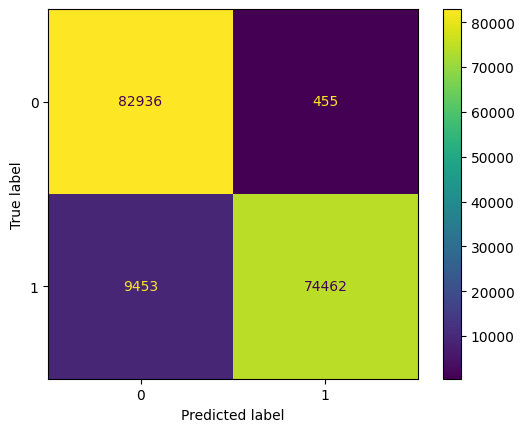

In [44]:
# oversampling
lr1 = LogisticRegression()
lr1.fit(x_train1, y_train1.ravel())
predictions = lr1.predict(x_test1)
  
# classification report
print(classification_report(y_test1, predictions))
confusionmatrix(predictions, y_test1)

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      7289
           1       0.68      0.66      0.67      7349

    accuracy                           0.68     14638
   macro avg       0.68      0.68      0.68     14638
weighted avg       0.68      0.68      0.68     14638



c:\Users\dilla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


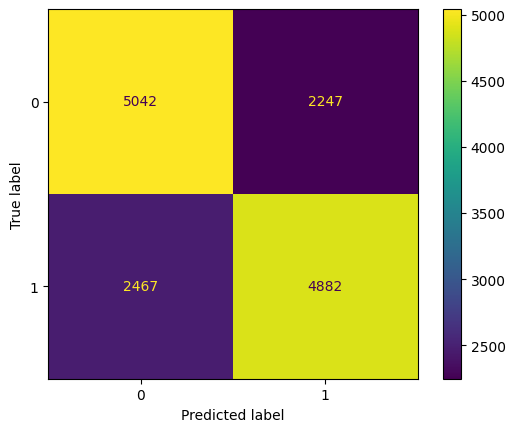

In [46]:
lr2 = LogisticRegression()
lr2.fit(x_train2, y_train2.ravel())
predictions = lr2.predict(x_test2)
  
# classification report
print(classification_report(y_test2, predictions))
confusionmatrix(predictions, y_test2)

In [96]:
# Inisialisasi model Logistic Regression
model = LogisticRegression()

# Latih model menggunakan data latih
model.fit(x_train1, y_train1)

# Lakukan prediksi menggunakan data uji
y_pred1 = model.predict(x_test1)

# Tampilkan classification report
print(classification_report(y_test1, y_pred1))

c:\Users\dilla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.90      1.00      0.94     84845
           1       0.99      0.89      0.94     84767

    accuracy                           0.94    169612
   macro avg       0.95      0.94      0.94    169612
weighted avg       0.95      0.94      0.94    169612



## Train Random Forest Model

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     84845
           1       0.99      0.92      0.95     84767

    accuracy                           0.96    169612
   macro avg       0.96      0.96      0.96    169612
weighted avg       0.96      0.96      0.96    169612



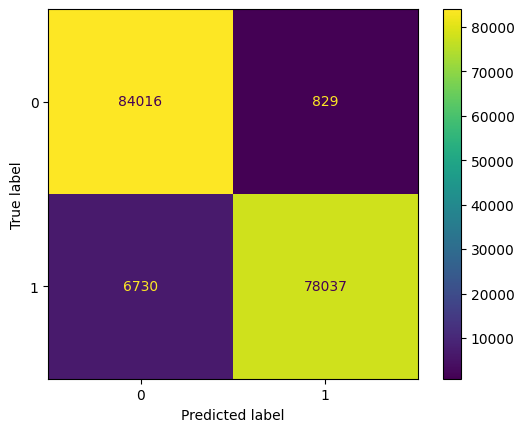

In [97]:
rf_model = RandomForestClassifier().fit(x_train1, y_train1)
predictions = rf_model.predict(x_test1)
  
# print classification report
print(classification_report(y_test1, predictions))
confusionmatrix(predictions, y_test1)

In [101]:
data_train1 = data_train.drop(columns = 'TARGET', axis=1)
data_train2 = data_train['TARGET']

In [102]:
rf_model.fit(data_train1, data_train2)

RandomForestClassifier()